In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

import re
import os

#### Data exploration

In [2]:
df = pd.read_csv('birds_19_common.csv') ## Reading in the data
df

,species,scientific_name,diet,length_(cm),wingspan_(cm),weight_(g),population_breeding,population_wintering,variation,feather_colour,leg_colour,beak_colour,beak_shape,natural_habitats
0,Wren,Troglodytes troglodytes,Insects and spiders.,9-10cm,13-17cm,7-12g,"11,000,000 territories",NaN,Wren,"['Brown', 'Cream/buff', 'White']","['Brown', 'Pink']",['Black'],"['Short', 'Curved', 'Thin']","['Woodland', 'Farmland', 'Heathland', 'Urban a..."
1,Robin,Erithacus rubecula,"Worms, seeds, fruits, insects and other invert...",14cm,20-22cm,14-21g,"7,350,000 territories",NaN,Robin (adult),"['Brown', 'Cream/buff', 'Grey', 'Orange', 'Red...","['Brown', 'Pink']",['Black'],"['Short', 'Thin']","['Woodland', 'Farmland', 'Urban and suburban']"
2,Robin,Erithacus rubecula,"Worms, seeds, fruits, insects and other invert...",14cm,20-22cm,14-21g,"7,350,000 territories",NaN,Robin (juvenile),"['Brown', 'Cream/buff', 'Orange', 'White', 'Ye...","['Brown', 'Pink']",['Black'],"['Short', 'Thin']","['Woodland', 'Farmland', 'Urban and suburban']"
3,House sparrow,Passer domesticus,Seeds and scraps.,14-15cm,21-25.5cm,24-38g,"5,300,000 pairs",NaN,House sparrow (adult male),"['Black', 'Brown', 'Cream/buff', 'Grey', 'White']","['Brown', 'Pink']","['Black', 'Brown']","['Short', 'Chunky']","['Farmland', 'Urban and suburban']"
4,House sparrow,Passer domesticus,Seeds and scraps.,14-15cm,21-25.5cm,24-38g,"5,300,000 pairs",NaN,House sparrow (adult female),"['Brown', 'Cream/buff', 'Grey']","['Brown', 'Pink']","['Black', 'Brown']","['Short', 'Chunky']","['Farmland', 'Urban and suburban']"
5,Woodpigeon,Columba palumbus,"Crops like cabbages, sprouts, peas and grain. ...",40-42cm,75-80cm,480-550g,"5,150,000 pairs",NaN,Woodpigeon (adult),"['Black', 'Blue', 'Brown', 'Grey', 'Pink/purpl...","['Brown', 'Pink', 'Red']","['Black', 'Brown', 'Orange']","['Medium length', 'Thin']","['Woodland', 'Farmland', 'Grassland', 'Urban a..."
6,Woodpigeon,Columba palumbus,"Crops like cabbages, sprouts, peas and grain. ...",40-42cm,75-80cm,480-550g,"5,150,000 pairs",NaN,Woodpigeon (juvenile),"['Black', 'Blue', 'Brown', 'Grey', 'Pink/purpl...","['Brown', 'Pink', 'Red']","['Black', 'Brown', 'Orange']","['Medium length', 'Thin']","['Woodland', 'Farmland', 'Grassland', 'Urban a..."
7,Blackbird,Turdus merula,Blackbird food consists of a variety of insect...,24-25cm,34-38.5cm,80-100g,"5,050,000 pairs",15 million,Blackbird (adult male),"['Black', 'Brown', 'White']",['Brown'],"['Black', 'Brown', 'Orange', 'Yellow']","['Medium length', 'Medium thickness']","['Woodland', 'Farmland', 'Grassland', 'Urban a..."
8,Blackbird,Turdus merula,Blackbird food consists of a variety of insect...,24-25cm,34-38.5cm,80-100g,"5,050,000 pairs",15 million,Blackbird (juvenile),"['Black', 'Brown', 'Cream/buff', 'Orange', 'Wh...",['Brown'],"['Black', 'Brown', 'Yellow']","['Medium length', 'Medium thickness']","['Woodland', 'Farmland', 'Grassland', 'Urban a..."
9,Chaffinch,Fringilla coelebs,Insects and seeds.,14.5cm,24.5-28.5cm,18-29g,5.05 million,NaN,Chaffinch (male),"['Black', 'Blue', 'Brown', 'Cream/buff', 'Gree...","['Brown', 'Pink']","['Black', 'Blue', 'Brown']","['Short', 'Chunky']","['Woodland', 'Farmland', 'Grassland', 'Heathla..."


In [4]:
df.info()
## The only nulls occur in population_wintering. This will only need to be handled if I end up using the population in some way
## All the columns are currently objects, but I may want to transfer length, wingspan, weight, and population to integers. I could alternatively group the measurements into categorical size bands (small <10cm, medium <20cm, etc). Even for that, it'd be best to transform the measurements into concrete numbers first
## Weight is harder to judge than size, and so only lengths and wingspans should be used for any size bands
## scientific_name will have to be dropped because it is perfectly correlated with species
## Similarly, variation will have to be changed to remove references to species name, i.e. 'Robin (adult)' -> adult
## The diet column could be made into a list, but could really just be dropped
## Can include seasonal data in further iterations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   species               19 non-null     object
 1   scientific_name       19 non-null     object
 2   length_(cm)           19 non-null     object
 3   wingspan_(cm)         19 non-null     object
 4   weight_(g)            19 non-null     object
 5   population_breeding   19 non-null     object
 6   population_wintering  4 non-null      object
 7   feather_colour        19 non-null     object
 8   leg_colour            19 non-null     object
 9   beak_colour           19 non-null     object
 10  beak_shape            19 non-null     object
 11  natural_habitats      19 non-null     object
dtypes: object(12)
memory usage: 1.9+ KB


In [20]:
df['species'].value_counts()
## Black-headed gull has the most variations, followed by herring gull

Black-headed gull         4
Herring gull              3
Goldfinch                 2
House sparrow             2
Woodpigeon                2
Blackbird                 2
Chaffinch                 2
Blue tit                  2
Great tit                 2
Starling                  2
Robin                     2
Greenfinch                2
Jackdaw                   1
Carrion crow              1
Wren                      1
Rock dove/Feral pigeon    1
Coal tit                  1
Collared dove             1
Magpie                    1
Name: species, dtype: int64

In [32]:
df['natural_habitats'].value_counts()
## All habitats seem to be very common. I'll get a better idea once I start to transform the columns

['Woodland', 'Farmland', 'Urban and suburban']                                                               8
['Farmland', 'Grassland', 'Marine and intertidal', 'Urban and suburban', 'Wetland']                          6
['Farmland', 'Urban and suburban']                                                                           5
['Woodland', 'Farmland', 'Grassland', 'Urban and suburban']                                                  4
['Woodland', 'Farmland', 'Grassland', 'Heathland', 'Urban and suburban']                                     2
['Woodland', 'Farmland', 'Grassland', 'Marine and intertidal', 'Upland', 'Urban and suburban', 'Wetland']    2
['Woodland', 'Farmland', 'Grassland', 'Heathland', 'Upland', 'Urban and suburban', 'Wetland']                2
['Woodland', 'Farmland', 'Heathland', 'Urban and suburban']                                                  1
['Woodland', 'Heathland', 'Urban and suburban']                                                              1
[

In [33]:
df['population_breeding'].value_counts()
## Lots of entries in the 5mil range

140,000 pairs             4
130,000 pairs             3
1.65 million              2
5,300,000 pairs           2
5,150,000 pairs           2
5,050,000 pairs           2
5.05 million              2
3,400,000 territories     2
2,350,000 territories     2
1.75 million              2
7,350,000 territories     2
785,000 pairs             2
1,550,000 pairs           1
1,050,000 territories     1
11,000,000 territories    1
465,000 pairs             1
660,000 territories       1
810,000 pairs             1
610,000 territories       1
Name: population_breeding, dtype: int64

In [34]:
df['population_wintering'].value_counts()

15 million       4
2.2 million      4
740,000 birds    3
Name: population_wintering, dtype: int64

## Refining my dataframes for further EDA

In order to make a test-train split of my data, I will want to remove the species of bird that only have one variation.

In [6]:
df['species'].value_counts()

Black-headed gull         4
Herring gull              3
Goldfinch                 2
House sparrow             2
Woodpigeon                2
Blackbird                 2
Chaffinch                 2
Blue tit                  2
Great tit                 2
Starling                  2
Robin                     2
Greenfinch                2
Jackdaw                   1
Carrion crow              1
Wren                      1
Rock dove/Feral pigeon    1
Coal tit                  1
Collared dove             1
Magpie                    1
Name: species, dtype: int64

In [5]:
single_list = ['Jackdaw','Carrion crow','Wren','Rock dove/Feral pigeon','Coal tit','Collared dove','Magpie'] ## List of birds with only a single variation

In [12]:
## Using the str contains method
df['species'].str.contains('Jackdaw|Carrion crow|Wren|Rock dove/Feral pigeon|Coal tit|Collared dove|Magpie')

0      True
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19     True
20     True
21     True
22    False
23    False
24    False
25     True
26     True
27    False
28    False
29    False
30    False
31    False
32    False
33     True
Name: species, dtype: bool

In [11]:
df['allowed'] = df['species'].str.contains('Jackdaw|Carrion crow|Wren|Rock dove/Feral pigeon|Coal tit|Collared dove|Magpie')
df[df['allowed']==False] ## Good

,species,scientific_name,diet,length_(cm),wingspan_(cm),weight_(g),population_breeding,population_wintering,variation,feather_colour,leg_colour,beak_colour,beak_shape,natural_habitats,allowed
1,Robin,Erithacus rubecula,"Worms, seeds, fruits, insects and other invert...",14cm,20-22cm,14-21g,"7,350,000 territories",NaN,Robin (adult),"['Brown', 'Cream/buff', 'Grey', 'Orange', 'Red...","['Brown', 'Pink']",['Black'],"['Short', 'Thin']","['Woodland', 'Farmland', 'Urban and suburban']",False
2,Robin,Erithacus rubecula,"Worms, seeds, fruits, insects and other invert...",14cm,20-22cm,14-21g,"7,350,000 territories",NaN,Robin (juvenile),"['Brown', 'Cream/buff', 'Orange', 'White', 'Ye...","['Brown', 'Pink']",['Black'],"['Short', 'Thin']","['Woodland', 'Farmland', 'Urban and suburban']",False
3,House sparrow,Passer domesticus,Seeds and scraps.,14-15cm,21-25.5cm,24-38g,"5,300,000 pairs",NaN,House sparrow (adult male),"['Black', 'Brown', 'Cream/buff', 'Grey', 'White']","['Brown', 'Pink']","['Black', 'Brown']","['Short', 'Chunky']","['Farmland', 'Urban and suburban']",False
4,House sparrow,Passer domesticus,Seeds and scraps.,14-15cm,21-25.5cm,24-38g,"5,300,000 pairs",NaN,House sparrow (adult female),"['Brown', 'Cream/buff', 'Grey']","['Brown', 'Pink']","['Black', 'Brown']","['Short', 'Chunky']","['Farmland', 'Urban and suburban']",False
5,Woodpigeon,Columba palumbus,"Crops like cabbages, sprouts, peas and grain. ...",40-42cm,75-80cm,480-550g,"5,150,000 pairs",NaN,Woodpigeon (adult),"['Black', 'Blue', 'Brown', 'Grey', 'Pink/purpl...","['Brown', 'Pink', 'Red']","['Black', 'Brown', 'Orange']","['Medium length', 'Thin']","['Woodland', 'Farmland', 'Grassland', 'Urban a...",False
6,Woodpigeon,Columba palumbus,"Crops like cabbages, sprouts, peas and grain. ...",40-42cm,75-80cm,480-550g,"5,150,000 pairs",NaN,Woodpigeon (juvenile),"['Black', 'Blue', 'Brown', 'Grey', 'Pink/purpl...","['Brown', 'Pink', 'Red']","['Black', 'Brown', 'Orange']","['Medium length', 'Thin']","['Woodland', 'Farmland', 'Grassland', 'Urban a...",False
7,Blackbird,Turdus merula,Blackbird food consists of a variety of insect...,24-25cm,34-38.5cm,80-100g,"5,050,000 pairs",15 million,Blackbird (adult male),"['Black', 'Brown', 'White']",['Brown'],"['Black', 'Brown', 'Orange', 'Yellow']","['Medium length', 'Medium thickness']","['Woodland', 'Farmland', 'Grassland', 'Urban a...",False
8,Blackbird,Turdus merula,Blackbird food consists of a variety of insect...,24-25cm,34-38.5cm,80-100g,"5,050,000 pairs",15 million,Blackbird (juvenile),"['Black', 'Brown', 'Cream/buff', 'Orange', 'Wh...",['Brown'],"['Black', 'Brown', 'Yellow']","['Medium length', 'Medium thickness']","['Woodland', 'Farmland', 'Grassland', 'Urban a...",False
9,Chaffinch,Fringilla coelebs,Insects and seeds.,14.5cm,24.5-28.5cm,18-29g,5.05 million,NaN,Chaffinch (male),"['Black', 'Blue', 'Brown', 'Cream/buff', 'Gree...","['Brown', 'Pink']","['Black', 'Blue', 'Brown']","['Short', 'Chunky']","['Woodland', 'Farmland', 'Grassland', 'Heathla...",False
10,Chaffinch,Fringilla coelebs,Insects and seeds.,14.5cm,24.5-28.5cm,18-29g,5.05 million,NaN,Chaffinch (female),"['Black', 'Brown', 'Cream/buff', 'Green', 'Gre...","['Brown', 'Pink']","['Black', 'Blue', 'Brown']","['Short', 'Chunky']","['Woodland', 'Farmland', 'Grassland', 'Heathla...",False


In [19]:
## Creating reduced dataframe
df_reduce = df[df['allowed']==False].copy()
df_reduce.drop(columns=['allowed'], inplace=True)

In [ ]:
## Saving reduced dataset
df_reduce.to_csv('birds_reduced.csv', index=False) ## Set index=False so that the index starts at 0 when the file is read in

In [42]:
df_ref = pd.read_csv('birds_reduced.csv') ## Reading in our new dataframe and assigning it to a new variable

#### Test-train splitting

In [ ]:
df_ref.sample(n=4) ## Taking a small random sample of my dataframe

## I initially got rows 6,18,23,12. I will make these into my testing set

In [43]:
## Testing set
test = df_ref.loc[[6,18,23,12]]
test

,species,scientific_name,diet,length_(cm),wingspan_(cm),weight_(g),population_breeding,population_wintering,variation,feather_colour,leg_colour,beak_colour,beak_shape,natural_habitats
6,Blackbird,Turdus merula,Blackbird food consists of a variety of insect...,24-25cm,34-38.5cm,80-100g,"5,050,000 pairs",15 million,Blackbird (adult male),"['Black', 'Brown', 'White']",['Brown'],"['Black', 'Brown', 'Orange', 'Yellow']","['Medium length', 'Medium thickness']","['Woodland', 'Farmland', 'Grassland', 'Urban a..."
18,Herring gull,Larus argentatus,"Ominivorous- carrion, offal, seeds, fruits, yo...",54-60cm,130-150cm,690-1440g,"130,000 pairs","740,000 birds",Herring gull,"['Black', 'Grey', 'White']",['Pink'],"['Red', 'Yellow']","['Medium length', 'Powerful', 'Chunky']","['Farmland', 'Grassland', 'Marine and intertid..."
23,Black-headed gull,Chroicocephalus ridibundus,"Worms, insects, fish and carrion.",34-37cm,100-110cm,200-400g,"140,000 pairs",2.2 million,Black-headed gull (first-winter plumage),"['Black', 'Brown', 'Cream/buff', 'Grey', 'White']","['Brown', 'Orange']","['Black', 'Orange', 'Red']","['Medium length', 'Medium thickness']","['Farmland', 'Marine and intertidal', 'Urban a..."
12,Great tit,Parus major,"Insects, seeds and nuts.",14cm,24cm,18g,"2,350,000 territories",NaN,Great tit,"['Black', 'Blue', 'Cream/buff', 'Green', 'Grey...",['Grey'],['Black'],"['Short', 'Thin']","['Woodland', 'Farmland', 'Urban and suburban']"


In [44]:
## Training set
train = df_ref.drop([6,18,23,12])
train

,species,scientific_name,diet,length_(cm),wingspan_(cm),weight_(g),population_breeding,population_wintering,variation,feather_colour,leg_colour,beak_colour,beak_shape,natural_habitats
0,Robin,Erithacus rubecula,"Worms, seeds, fruits, insects and other invert...",14cm,20-22cm,14-21g,"7,350,000 territories",NaN,Robin (adult),"['Brown', 'Cream/buff', 'Grey', 'Orange', 'Red...","['Brown', 'Pink']",['Black'],"['Short', 'Thin']","['Woodland', 'Farmland', 'Urban and suburban']"
1,Robin,Erithacus rubecula,"Worms, seeds, fruits, insects and other invert...",14cm,20-22cm,14-21g,"7,350,000 territories",NaN,Robin (juvenile),"['Brown', 'Cream/buff', 'Orange', 'White', 'Ye...","['Brown', 'Pink']",['Black'],"['Short', 'Thin']","['Woodland', 'Farmland', 'Urban and suburban']"
2,House sparrow,Passer domesticus,Seeds and scraps.,14-15cm,21-25.5cm,24-38g,"5,300,000 pairs",NaN,House sparrow (adult male),"['Black', 'Brown', 'Cream/buff', 'Grey', 'White']","['Brown', 'Pink']","['Black', 'Brown']","['Short', 'Chunky']","['Farmland', 'Urban and suburban']"
3,House sparrow,Passer domesticus,Seeds and scraps.,14-15cm,21-25.5cm,24-38g,"5,300,000 pairs",NaN,House sparrow (adult female),"['Brown', 'Cream/buff', 'Grey']","['Brown', 'Pink']","['Black', 'Brown']","['Short', 'Chunky']","['Farmland', 'Urban and suburban']"
4,Woodpigeon,Columba palumbus,"Crops like cabbages, sprouts, peas and grain. ...",40-42cm,75-80cm,480-550g,"5,150,000 pairs",NaN,Woodpigeon (adult),"['Black', 'Blue', 'Brown', 'Grey', 'Pink/purpl...","['Brown', 'Pink', 'Red']","['Black', 'Brown', 'Orange']","['Medium length', 'Thin']","['Woodland', 'Farmland', 'Grassland', 'Urban a..."
5,Woodpigeon,Columba palumbus,"Crops like cabbages, sprouts, peas and grain. ...",40-42cm,75-80cm,480-550g,"5,150,000 pairs",NaN,Woodpigeon (juvenile),"['Black', 'Blue', 'Brown', 'Grey', 'Pink/purpl...","['Brown', 'Pink', 'Red']","['Black', 'Brown', 'Orange']","['Medium length', 'Thin']","['Woodland', 'Farmland', 'Grassland', 'Urban a..."
7,Blackbird,Turdus merula,Blackbird food consists of a variety of insect...,24-25cm,34-38.5cm,80-100g,"5,050,000 pairs",15 million,Blackbird (juvenile),"['Black', 'Brown', 'Cream/buff', 'Orange', 'Wh...",['Brown'],"['Black', 'Brown', 'Yellow']","['Medium length', 'Medium thickness']","['Woodland', 'Farmland', 'Grassland', 'Urban a..."
8,Chaffinch,Fringilla coelebs,Insects and seeds.,14.5cm,24.5-28.5cm,18-29g,5.05 million,NaN,Chaffinch (male),"['Black', 'Blue', 'Brown', 'Cream/buff', 'Gree...","['Brown', 'Pink']","['Black', 'Blue', 'Brown']","['Short', 'Chunky']","['Woodland', 'Farmland', 'Grassland', 'Heathla..."
9,Chaffinch,Fringilla coelebs,Insects and seeds.,14.5cm,24.5-28.5cm,18-29g,5.05 million,NaN,Chaffinch (female),"['Black', 'Brown', 'Cream/buff', 'Green', 'Gre...","['Brown', 'Pink']","['Black', 'Blue', 'Brown']","['Short', 'Chunky']","['Woodland', 'Farmland', 'Grassland', 'Heathla..."
10,Blue tit,Cyanistes caeruleus,"Insects, caterpillars, seeds and nuts.",12cm,18cm,11g,"3,400,000 territories",15 million,Blue tit,"['Black', 'Blue', 'Green', 'Grey', 'White', 'Y...","['Blue', 'Grey']",['Black'],"['Short', 'Thin']","['Woodland', 'Farmland', 'Urban and suburban']"


In [ ]:
## Saving the dataframes to csv
test.to_csv('birds_testing_set2.csv')
train.to_csv('birds_training_set2.csv')

#### Formatting columns

Population

In [21]:
df_ref['population_breeding'].value_counts()
## My final result for population will be in terms of birds
## As such, I will need format the population entries as integers. To do this, I clean them of commas and words, and multiply them by the appropriate amount
## pairs -> x2; territories -> x2; million -> x10**6

140,000 pairs            4
130,000 pairs            3
7,350,000 territories    2
5,300,000 pairs          2
5,150,000 pairs          2
5,050,000 pairs          2
5.05 million             2
3,400,000 territories    2
2,350,000 territories    2
1.75 million             2
1.65 million             2
785,000 pairs            2
Name: population_breeding, dtype: int64

In [22]:
df_ref['population_wintering'].value_counts() ## Same function should apply for both breeding and wintering populations

15 million       4
2.2 million      4
740,000 birds    3
Name: population_wintering, dtype: int64

In [4]:
def population_clean(string):
    try:
        clean = string.replace(',','') ## Removing commas
        clean = clean.split() ## Creating a list of the number and the unit

        clean[0] = float(clean[0]) ## Converting number to float
        if clean[1] == 'pairs' or clean[1] == 'territories': ## Multiplying number by two if unit is 'pair' or 'territories'
            clean[0] *= 2
        elif clean[1] == 'million': ## Multiplying number by one million if unit is 'million'
            clean[0] *= 10**6
        ## No multiply by anything if unit is already 'birds'

        clean = int(clean[0]) ## Keeping just the number. It makes sense to be an integer as you can't have a fractional birds

        return clean

    except AttributeError: ## Need try and except branch to work around nulls in wintering population; np.NAN is a float and not a string
        pass

In [45]:
df_ref['population_breeding'] = df_ref['population_breeding'].apply(population_clean) ## Applying function to the breeding population
df_ref['population_wintering'] = df_ref['population_wintering'].apply(population_clean) ## Applying function to the wintering population

In [133]:
df_ref[['population_breeding','population_wintering']] ## Good - everything's worked

,population_breeding,population_wintering
1,14700000,NaN
2,14700000,NaN
3,10600000,NaN
4,10600000,NaN
5,10300000,NaN
6,10300000,NaN
7,10100000,15000000.0
8,10100000,15000000.0
9,5050000,NaN
10,5050000,NaN


Physical measurements

In [6]:
## Taking the average of the length, wingspan or weight

def measurement_avg(string):
    avg = re.sub('\s?[cmg]+','',string) ## This works to remove either the gram and centimetre unit
    avg = avg.split('-') ## Creates a list of the measurement values
    avg = [float(item) for item in avg] ## Converts elements of the list into numbers
    avg = np.mean(avg) ## Takes the mean of the list
    return avg

In [46]:
## Applying my new function to the dataframe
df_ref['length_(cm)'] = df_ref['length_(cm)'].apply(measurement_avg)
df_ref['wingspan_(cm)'] = df_ref['wingspan_(cm)'].apply(measurement_avg)
df_ref['weight_(g)'] = df_ref['weight_(g)'].apply(measurement_avg)

In [19]:
df_ref[['length_(cm)','wingspan_(cm)','weight_(g)']] ## Excellent

,length_(cm),wingspan_(cm),weight_(g)
0,14.0,21.00,17.5
1,14.0,21.00,17.5
2,14.5,23.25,31.0
3,14.5,23.25,31.0
4,41.0,77.50,515.0
5,41.0,77.50,515.0
6,24.5,36.25,90.0
7,24.5,36.25,90.0
8,14.5,26.50,23.5
9,14.5,26.50,23.5


Species variations

In [158]:
df_ref[['species','variation']]
## I need to transform the variation column so as to remove the species name. I will then map the variations as follows:
## species name -> adult; (adult) -> adult; (juvenile) -> juvenile; (adult male/female) -> adult male/female; (male/female) -> adult male/female; (plumage) -> juvenile/adult

,species,variation
1,Robin,Robin (adult)
2,Robin,Robin (juvenile)
3,House sparrow,House sparrow (adult male)
4,House sparrow,House sparrow (adult female)
5,Woodpigeon,Woodpigeon (adult)
6,Woodpigeon,Woodpigeon (juvenile)
7,Blackbird,Blackbird (adult male)
8,Blackbird,Blackbird (juvenile)
9,Chaffinch,Chaffinch (male)
10,Chaffinch,Chaffinch (female)


In [8]:
def variation_clean(string):
    if '(' not in string: ## If no brackets are present, the variation name is the same as the species name
        clean = 'adult'
    else:
        clean = string.split('(') ## Splitting the variation name where the specification occurs
        clean = clean[1].replace(')','') ## Keeping the variation name without the closing bracket

        if clean == 'male': ## Formatting the male/female variations. If there was a longer list, maybe a dictionary could have been used?
            clean = 'adult male'
        elif clean == 'female':
            clean = 'adult female'
        elif clean == 'first-winter plumage': ## Black-headed gulls reach breeding age after two years
            clean = 'juvenile'
        elif clean == 'second-winter plumage':
            clean = 'juvenile'
        elif clean == 'summer plumage':
            clean = 'adult'
        elif clean == 'winter plumage':
            clean = 'adult'

    return clean

In [9]:
df_ref['variation'] = df_ref['variation'].apply(variation_clean)

Handling all lists

In [47]:
## Applying eval() to all relevant columns
df_ref['feather_colour'] = df_ref['feather_colour'].apply(eval)
df_ref['leg_colour'] = df_ref['leg_colour'].apply(eval)
df_ref['beak_colour'] = df_ref['beak_colour'].apply(eval)
df_ref['beak_shape'] = df_ref['beak_shape'].apply(eval)
df_ref['natural_habitats'] = df_ref['natural_habitats'].apply(eval)

In [38]:
## Checking the type of an entry in one of the columns above
type(df_ref['feather_colour'][0]) ## The type of object is a list, as desired

list

In [11]:
## The following function is by Max Hisldorf (taken from https://towardsdatascience.com/dealing-with-list-values-in-pandas-dataframes-a177e534f173)
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

## How does this work?
## The input is a pandas series of lists
## The output is the panda series of a rather odd-looking list comprehension. Nonetheless, it's rather simple: we all the 'x' values, where x is in a list, and that list is within a series
## The utility of making the final output a series is that we can apply useful methods and attributes such as value_counts()
## The odd order is inherent to the logic of Python: instead writing [x for x in _list for _list in series] will not work

In [26]:
## Testing the function
to_1D(df_ref['feather_colour']).value_counts() ## It works

White          25
Black          24
Brown          21
Grey           21
Cream/buff     19
Yellow         12
Green           9
Blue            8
Orange          4
Pink/purple     4
Red             3
dtype: int64

### EDA

In [13]:
## Feather colours
col = to_1D(df_ref['feather_colour']).value_counts().index.tolist()
col_count = to_1D(df_ref['feather_colour']).value_counts()

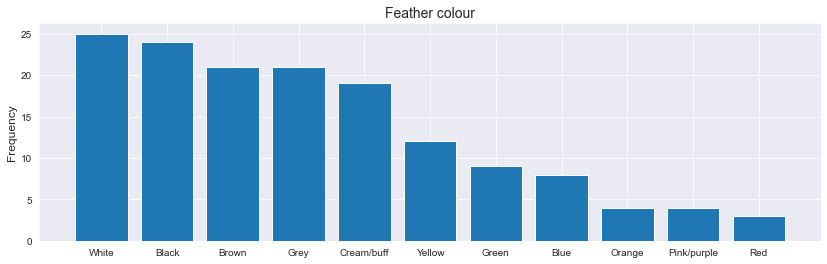

In [14]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(col, col_count)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Feather colour", size = 14)

#plt.savefig('feather_colours.png', dpi = 300, bbox_inches = 'tight')
plt.show()

## White is the most common colour; Red is the least
## There are only 27 birds in the dataset, and so it should be clear that each bird has multiple colours in its plumage

In [4]:
df['feather_colour'].value_counts()
## Multiple uncommon colours (such as green or purple) often occur on the same bird

['Black', 'Brown', 'Cream/buff', 'Grey', 'White']                                                               4
['Black', 'Brown', 'Cream/buff', 'Green', 'Grey', 'White', 'Yellow']                                            3
['Black', 'Blue', 'Brown', 'Grey', 'Pink/purple', 'White']                                                      2
['Black', 'Grey', 'White']                                                                                      2
['Black', 'Blue', 'Green', 'Grey', 'White', 'Yellow']                                                           2
['Black', 'Blue', 'Cream/buff', 'Green', 'Grey', 'White', 'Yellow']                                             2
['Brown', 'Cream/buff', 'White']                                                                                1
['Black', 'Brown', 'Cream/buff', 'White', 'Yellow']                                                             1
['Black', 'Brown', 'Grey', 'White']                                                     

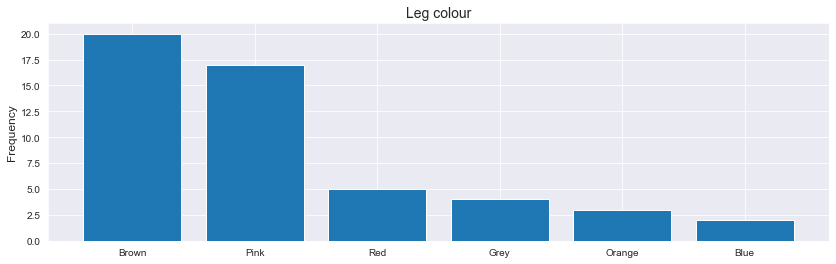

In [30]:
## Leg colour
col = to_1D(df_ref['leg_colour']).value_counts().index.tolist()
col_count = to_1D(df_ref['leg_colour']).value_counts()

fig, ax = plt.subplots(figsize = (14,4))
ax.bar(col, col_count)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Leg colour", size = 14)
plt.show()

## Brown is the most common colour; Blue the least

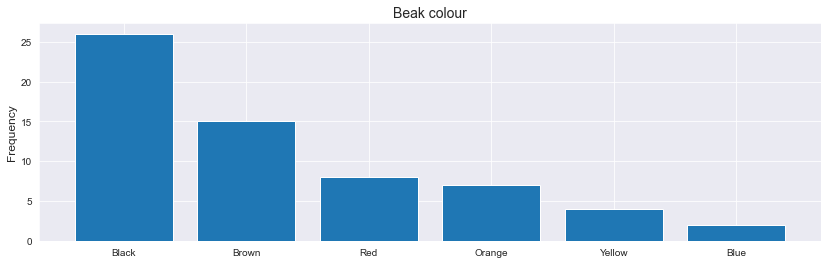

In [16]:
## Beak colour
col = to_1D(df_ref['beak_colour']).value_counts().index.tolist()
col_count = to_1D(df_ref['beak_colour']).value_counts()

fig, ax = plt.subplots(figsize = (14,4))
ax.bar(col, col_count)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Beak colour", size = 14)

#plt.savefig('beak_colours.png', dpi = 300, bbox_inches = 'tight')
plt.show()

## Black is most common by far; blue is the least

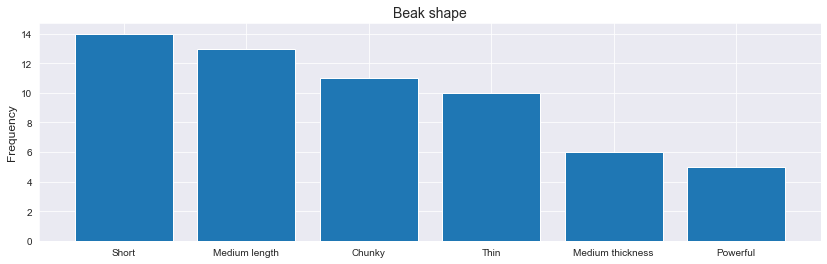

In [15]:
## Beak shape
col = to_1D(df_ref['beak_shape']).value_counts().index.tolist()
col_count = to_1D(df_ref['beak_shape']).value_counts()

fig, ax = plt.subplots(figsize = (14,4))
ax.bar(col, col_count)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Beak shape", size = 14)

#plt.savefig('beak_shapes.png', dpi = 300, bbox_inches = 'tight')
plt.show()

## Short beaks are the most common, but not by much compared to medium length beaks
## A similar relationship holds for chunky beaks compared to thin ones

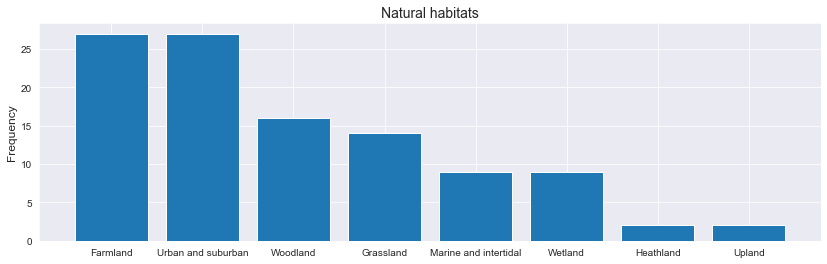

In [20]:
## Habitat
col = to_1D(df_ref['natural_habitats']).value_counts().index.tolist()
col_count = to_1D(df_ref['natural_habitats']).value_counts()

fig, ax = plt.subplots(figsize = (14,4))
ax.bar(col, col_count)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Natural habitats", size = 14)
plt.show()

## Farmland and urban areas are the most common; Upland and heathland are least common

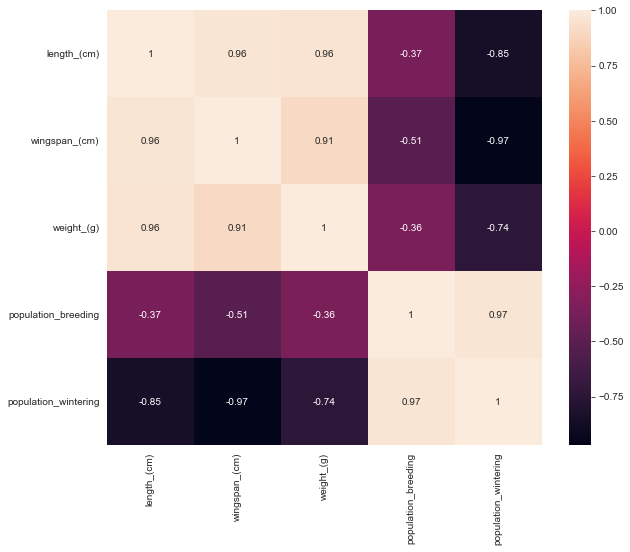

In [20]:
## Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df_ref.corr(),
            annot=True,
            square=True
            )
plt.show()

## Size measurements are highly correlated with each other
## Strong inverse correlations between wintering population and size measurements - keep in mind that wintering population currently has many nulls

In [48]:
## Loading in the training dataset
train = pd.read_csv('birds_training_set2.csv',
                    index_col=['Unnamed: 0'] ## Getting the correct index column
                    )
train

,species,scientific_name,diet,length_(cm),wingspan_(cm),weight_(g),population_breeding,population_wintering,variation,feather_colour,leg_colour,beak_colour,beak_shape,natural_habitats
0,Robin,Erithacus rubecula,"Worms, seeds, fruits, insects and other invert...",14cm,20-22cm,14-21g,"7,350,000 territories",NaN,Robin (adult),"['Brown', 'Cream/buff', 'Grey', 'Orange', 'Red...","['Brown', 'Pink']",['Black'],"['Short', 'Thin']","['Woodland', 'Farmland', 'Urban and suburban']"
1,Robin,Erithacus rubecula,"Worms, seeds, fruits, insects and other invert...",14cm,20-22cm,14-21g,"7,350,000 territories",NaN,Robin (juvenile),"['Brown', 'Cream/buff', 'Orange', 'White', 'Ye...","['Brown', 'Pink']",['Black'],"['Short', 'Thin']","['Woodland', 'Farmland', 'Urban and suburban']"
2,House sparrow,Passer domesticus,Seeds and scraps.,14-15cm,21-25.5cm,24-38g,"5,300,000 pairs",NaN,House sparrow (adult male),"['Black', 'Brown', 'Cream/buff', 'Grey', 'White']","['Brown', 'Pink']","['Black', 'Brown']","['Short', 'Chunky']","['Farmland', 'Urban and suburban']"
3,House sparrow,Passer domesticus,Seeds and scraps.,14-15cm,21-25.5cm,24-38g,"5,300,000 pairs",NaN,House sparrow (adult female),"['Brown', 'Cream/buff', 'Grey']","['Brown', 'Pink']","['Black', 'Brown']","['Short', 'Chunky']","['Farmland', 'Urban and suburban']"
4,Woodpigeon,Columba palumbus,"Crops like cabbages, sprouts, peas and grain. ...",40-42cm,75-80cm,480-550g,"5,150,000 pairs",NaN,Woodpigeon (adult),"['Black', 'Blue', 'Brown', 'Grey', 'Pink/purpl...","['Brown', 'Pink', 'Red']","['Black', 'Brown', 'Orange']","['Medium length', 'Thin']","['Woodland', 'Farmland', 'Grassland', 'Urban a..."
5,Woodpigeon,Columba palumbus,"Crops like cabbages, sprouts, peas and grain. ...",40-42cm,75-80cm,480-550g,"5,150,000 pairs",NaN,Woodpigeon (juvenile),"['Black', 'Blue', 'Brown', 'Grey', 'Pink/purpl...","['Brown', 'Pink', 'Red']","['Black', 'Brown', 'Orange']","['Medium length', 'Thin']","['Woodland', 'Farmland', 'Grassland', 'Urban a..."
7,Blackbird,Turdus merula,Blackbird food consists of a variety of insect...,24-25cm,34-38.5cm,80-100g,"5,050,000 pairs",15 million,Blackbird (juvenile),"['Black', 'Brown', 'Cream/buff', 'Orange', 'Wh...",['Brown'],"['Black', 'Brown', 'Yellow']","['Medium length', 'Medium thickness']","['Woodland', 'Farmland', 'Grassland', 'Urban a..."
8,Chaffinch,Fringilla coelebs,Insects and seeds.,14.5cm,24.5-28.5cm,18-29g,5.05 million,NaN,Chaffinch (male),"['Black', 'Blue', 'Brown', 'Cream/buff', 'Gree...","['Brown', 'Pink']","['Black', 'Blue', 'Brown']","['Short', 'Chunky']","['Woodland', 'Farmland', 'Grassland', 'Heathla..."
9,Chaffinch,Fringilla coelebs,Insects and seeds.,14.5cm,24.5-28.5cm,18-29g,5.05 million,NaN,Chaffinch (female),"['Black', 'Brown', 'Cream/buff', 'Green', 'Gre...","['Brown', 'Pink']","['Black', 'Blue', 'Brown']","['Short', 'Chunky']","['Woodland', 'Farmland', 'Grassland', 'Heathla..."
10,Blue tit,Cyanistes caeruleus,"Insects, caterpillars, seeds and nuts.",12cm,18cm,11g,"3,400,000 territories",15 million,Blue tit,"['Black', 'Blue', 'Green', 'Grey', 'White', 'Y...","['Blue', 'Grey']",['Black'],"['Short', 'Thin']","['Woodland', 'Farmland', 'Urban and suburban']"


In [33]:
df_ref['length_(cm)'].describe()
## The median and lower quartile are very close to each other, implying that the data is skewed towards smaller birds. This make sense considering the types of birds found in the UK.

count    27.000000
mean     25.111111
std      15.010466
min      12.000000
25%      14.000000
50%      15.000000
75%      35.500000
max      57.000000
Name: length_(cm), dtype: float64

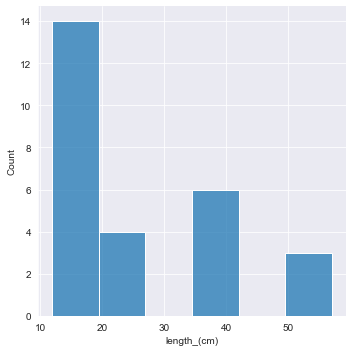

In [51]:
## Lengths in the full set of data
sns.displot(data=df_ref,
            x='length_(cm)')
plt.show()

In [49]:
## Lengths in the training set
train['length_(cm)'].apply(measurement_avg).describe()
## Not too different from the full dataset

count    23.000000
mean     23.782609
std      14.411033
min      12.000000
25%      14.000000
50%      15.000000
75%      35.500000
max      57.000000
Name: length_(cm), dtype: float64

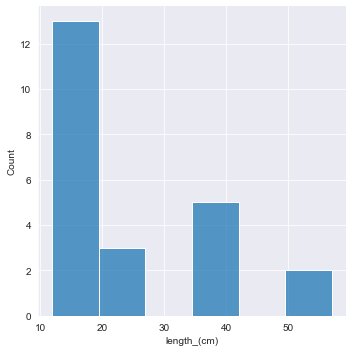

In [52]:
## Visualisation of training lengths
sns.displot(train['length_(cm)'].apply(measurement_avg))

#plt.savefig('training_lengths.png', dpi = 300, bbox_inches = 'tight')
plt.show()

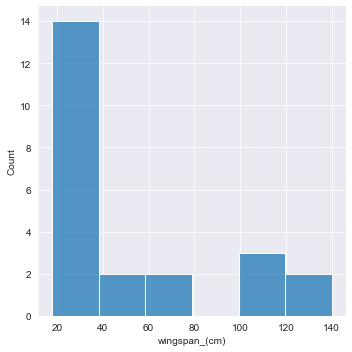

In [42]:
## Training wingspans
sns.displot(train['wingspan_(cm)'].apply(measurement_avg))
plt.show()
## This matches up with the previous assertion that most birds are small. However, we see more, wider wingspans than long birds

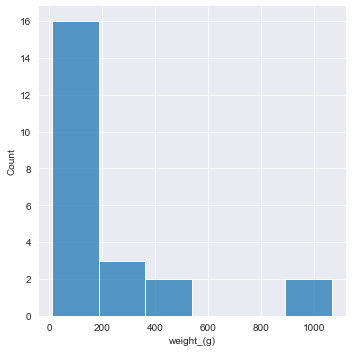

In [43]:
## Training weights
sns.displot(train['weight_(g)'].apply(measurement_avg))
plt.show()

In [ ]:
## To group the birds into sizes, I'll use the median, upper and lower quartiles of my training lengths as my cut-offs for small, medium and large
## It makes the most sense to class the size based on length as weight can be hard to judge, and wingspan is only apparent when the bird has open wings (e.g. it is flying)

In [87]:
def size_estimator(length):
    if length <= 14: ## Lower quartile of training lengths
        return 'Small (<15cm)'
    elif length > 35: ## Upper quartile of training lengths
        return 'Large (>35cm)'
    else:
        return 'Medium (15-35cm)'

In [88]:
df_ref['length_(cm)'].apply(size_estimator)

0     Medium (14-35cm)
1     Medium (14-35cm)
2     Medium (14-35cm)
3     Medium (14-35cm)
4        Large (>35cm)
5        Large (>35cm)
6     Medium (14-35cm)
7     Medium (14-35cm)
8        Small (<14cm)
9        Small (<14cm)
10       Small (<14cm)
11       Small (<14cm)
12    Medium (14-35cm)
13    Medium (14-35cm)
14    Medium (14-35cm)
15    Medium (14-35cm)
16       Small (<14cm)
17       Small (<14cm)
18       Large (>35cm)
19       Large (>35cm)
20       Large (>35cm)
21       Large (>35cm)
22       Large (>35cm)
23       Large (>35cm)
24       Large (>35cm)
25    Medium (14-35cm)
26    Medium (14-35cm)
Name: length_(cm), dtype: object

In [113]:
## Feather colours
def in_list_white(list):
    if 'White' in list:
        return 1
    else:
        return 0

def in_list_black(list):
    if 'Black' in list:
        return 1
    else:
        return 0

def in_list_brown(list):
    if 'Brown' in list:
        return 1
    else:
        return 0

def in_list_orange(list):
    if 'Orange' in list:
        return 1
    else:
        return 0

def in_list_pink_purple(list):
    if 'Pink/purple' or 'Pink' or 'Purple' in list:
        return 1
    else:
        return 0

def in_list_red(list):
    if 'Red' in list:
        return 1
    else:
        return 0

## Leg colours
## Brown, red, pink, orange already covered

def in_list_grey(list):
    if 'Grey' in list:
        return 1
    else:
        return 0

def in_list_blue(list):
    if 'Blue' in list:
        return 1
    else:
        return 0

## Beak colours
## Only need to cover yellow

def in_list_yellow(list):
    if 'Yellow' in list:
        return 1
    else:
        return 0

## Beak shape
def in_list_short(list):
    if 'Short' in list:
        return 1
    else:
        return 0

def in_list_med_length(list):
    if 'Medium length' in list:
        return 1
    else:
        return 0

def in_list_chunky(list):
    if 'Chunky' in list:
        return 1
    else:
        return 0

def in_list_thin(list):
    if 'Thin' in list:
        return 1
    else:
        return 0

def in_list_med_thick(list):
    if 'Medium thickness' in list:
        return 1
    else:
        return 0

def in_list_powerful(list):
    if 'Powerful' in list:
        return 1
    else:
        return 0

## Natural habitats
def in_list_farmland(list):
    if 'Farmland' in list:
        return 1
    else:
        return 0

def in_list_urban(list):
    if 'Urban and suburban' in list:
        return 1
    else:
        return 0

def in_list_woodland(list):
    if 'Woodland' in list:
        return 1
    else:
        return 0

def in_list_wetland(list):
    if 'Wetland' in list:
        return 1
    else:
        return 0

def in_list_heath(list):
    if 'Heathland' in list:
        return 1
    else:
        return 0

def in_list_upland(list):
    if 'Upland' in list:
        return 1
    else:
        return 0